# Extreme Heat Hazard
This notebook calculates the urban risk index for Extreme heat (EXH) hazard.  
The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The EXH hazard expected loss (EL) includes consequences for the following receptors and marginal losses.
 * People/ excess deaths

#### 1a. People / excess deaths
The HH&C database was used to estimate the number of heat event that occur per year in each borough.  
This information was  downscaled to the census tract level. 
The median number of excess deaths due to extreme heat per year was determined to be 121 (Matte et al 2016).
The deaths were distributed evenly across the continent.  

Text(0.5, 1.0, 'USD Losses due to Extreme Heat Deaths')

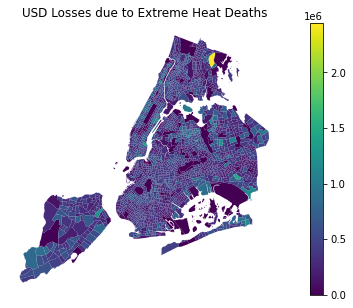

In [9]:
from MISC import params_1 as params
from MISC import utils_1 as utils
from CLASSES import class_EL_SV_CR_1 as URI
import matplotlib.pyplot as plt
import geopandas as gpd
import os
utils.set_home()
hazard_name = "EXH"


#create ESL class and add loss
path_ESL_deaths =   params.PATHNAMES.at['EXH_ESL_deaths_per_year_tract', 'Value']
gdf_ESL_deaths = gpd.read_file(path_ESL_deaths)
ESL = URI.ESL(hazard_name = hazard_name)
ESL.add_consequence("Deaths", "People", gdf_ESL_deaths)

#plot results
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
gdf_ESL_deaths.plot(ax=ax, column = 'Loss_USD', legend=True )
plt.axis('off')
plt.title('USD Losses due to Extreme Heat Deaths')


#### 1b. Expected Loss Total
The total expected losses are the sum of losses from each individual consequence.  

Text(0.5, 1.0, 'USD Loss Total due to EXH')

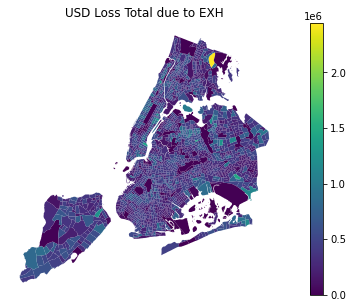

In [10]:
#total all consequences
ESL.calc_ESL_total()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ESL.ESL_map.plot(ax=ax, column = 'Loss_USD', legend=True )
plt.axis('off')
plt.title('USD Loss Total due to EXH')

## 2. Social Vulnerability Score
The Social Vulnerability is based on the CDC SoVI score.

Text(0.5, 1.0, 'Social Vulnerability Score')

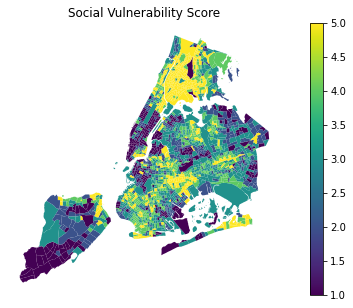

In [11]:
path_SOV = params.PATHNAMES.at['SOV_results_raw', 'Value']
gdf_SOV = gpd.read_file(path_SOV)
SOV = URI.SOV(hazard_name = hazard_name, map_tract = gdf_SOV)

#plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
SOV.SOV_map.plot(ax=ax, column = 'Score', legend=True)
plt.axis('off')
plt.title('Social Vulnerability Score')

## 3. Resilience Capacity Score
The Resilience Capacity is the sum of four scores:
- Community capital
- Mitigation Landscape
- Response Capacity
- Recovery Resources


Text(0.5, 1.0, 'Resilience Capacity Score')

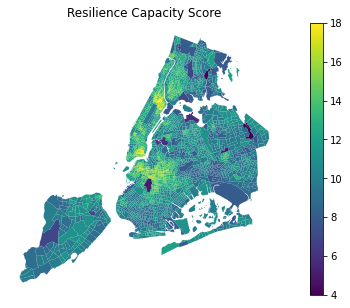

In [12]:
path_RCA = params.PATHNAMES.at['EXH_RCA_composite_score', 'Value']
gdf_RCA = gpd.read_file(path_RCA)
RCA = URI.RCA(hazard_name=hazard_name, map_tract=gdf_RCA)
#plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
RCA.RCA_map.plot(ax=ax, column = 'Score', legend=True)
plt.axis('off')
plt.title('Resilience Capacity Score')

## 4. Calculate URI Score
The URI is ESL * SOV / RCA.  The result is clustered into a score of 1 (low) to 5 (high).

Text(0.5, 1.0, 'URI Score EXH')

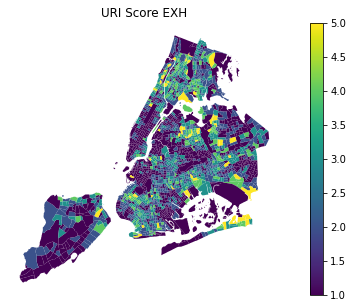

In [13]:
URI_EXH = URI.URI(hazard_name=hazard_name, ESL=ESL, SOV=SOV, RCA=RCA)
URI_EXH.calc_URI()

#plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
URI_EXH.URI_map.plot(ax=ax, column = 'URI_Score', legend=True)
plt.axis('off')
plt.title('URI Score EXH')